In [1]:
import sys
from tqdm import tqdm
from fitter import Fitter, get_common_distributions

sys.path.append("../")
from calculus_path_mod.term_engine import *
from calculus_path_mod.reduction_strategy import *
from calculus_path_mod.term_generation import gen_filtered_lambda_terms

from calculus_path_mod.json_serialization import load_terms
from calculus_utils.outliers_cleaning import clear_arr
from calculus_utils.drawing import draw_steps_displot

Lambda = Abstraction
App = Application

# Load terms from file

In [2]:
terms = load_terms("../terms_210_filtered_RI.dat")

# Run Experiments

In [3]:
n_strategy = RIStrategy()
steps_RI = [term.normalize(n_strategy)[1] for term in tqdm(terms, desc="RI")]

n_strategy = RandomOuterStrategy(prob_norm="softmax")
steps_RandOut_soft = [term.normalize(n_strategy)[1] for term in tqdm(terms, desc="RandO soft")]

n_strategy = RandomOuterStrategy(prob_norm="sum")
steps_RandOut_sum = [term.normalize(n_strategy)[1] for term in tqdm(terms, desc="Rand0 sum")]

n_strategy = RandomOuterStrategy(prob_norm="pow_2")
steps_RandOut_pow_2 = [term.normalize(n_strategy)[1] for term in tqdm(terms, desc="RandO pow2")]

n_strategy = RandomInnerStrategy(prob_norm="softmax")
steps_RandIn_soft = [term.normalize(n_strategy)[1] for term in tqdm(terms, desc="RandI soft")]

n_strategy = RandomInnerStrategy(prob_norm="sum")
steps_RandIn_sum = [term.normalize(n_strategy)[1] for term in tqdm(terms, desc="RandI sum")]

n_strategy = RandomInnerStrategy(prob_norm="pow_2")
steps_RandIn_pow_2 = [term.normalize(n_strategy)[1] for term in tqdm(terms, desc="RandI pow2")]

RandI pow2: 100%|██████████| 223/223 [00:03<00:00, 56.43it/s]


# Get Expected Values

In [4]:
def get_expected_steps(steps):
    steps = list(filter(lambda x: x != float("inf"), steps))
    steps = list(filter(lambda x: x != 0, steps))

    distributions = get_common_distributions()
    distributions.remove("expon")
    f_ln = Fitter([np.log(step) for step in steps], distributions=distributions)
    f_ln.fit()

    mu, sigma = f_ln.fitted_param["norm"]
    result = np.e ** (mu + (sigma ** 2) / 2)
    return result

In [5]:
expected_values = dict()
expected_values["RI"] = get_expected_steps(steps_RI)

expected_values["RandOut_soft"] = get_expected_steps(steps_RandOut_soft)
expected_values["RandOut_sum"] = get_expected_steps(steps_RandOut_sum)
expected_values["RandOut_pow2"] = get_expected_steps(steps_RandOut_pow_2)

expected_values["RandIn_soft"] = get_expected_steps(steps_RandIn_soft)
expected_values["RandIn_sum"] = get_expected_steps(steps_RandIn_sum)
expected_values["RandIn_pow2"] = get_expected_steps(steps_RandIn_pow_2)

Fitting 9 distributions: 100%|██████████| 9/9 [00:00<00:00, 32.97it/s]


In [6]:
for key, val in expected_values.items():
    print(f"{key}: {val}")

RI: 10.46004658948474
RandOut_soft: 9.64341509360455
RandOut_sum: 10.602676386986081
RandOut_pow2: 10.085107068453278
RandIn_soft: 11.09484002446824
RandIn_sum: 11.511918894814283
RandIn_pow2: 11.274707919652396


# Compare Results

## RI vs RandOut soft vs RandOut sum vs RandOut pow 2

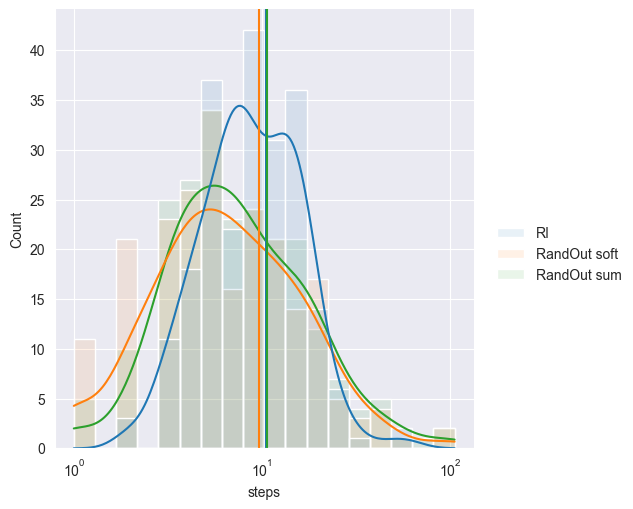

In [7]:
draw_steps_displot(data_to_draw={"RI": steps_RI,
                                 "RandOut soft": steps_RandOut_soft,
                                 "RandOut sum": steps_RandOut_sum},
                   y_lines=(expected_values["RI"], expected_values["RandOut_soft"], expected_values["RandOut_sum"]),
                   multiple="layer", element="bars", alpha=0.1)

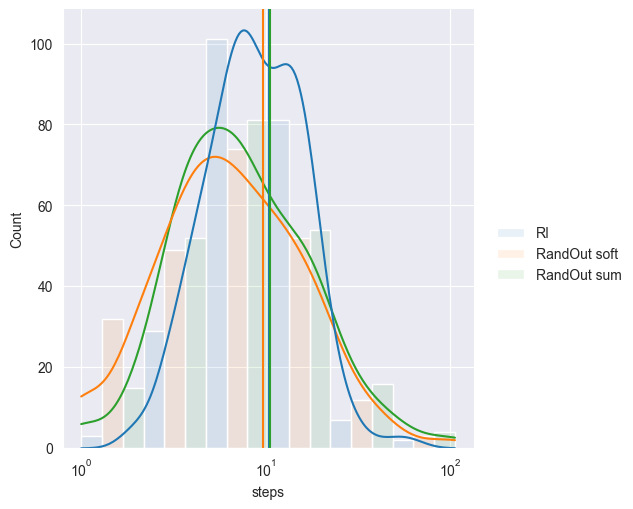

In [8]:
draw_steps_displot(data_to_draw={"RI": steps_RI,
                                 "RandOut soft": steps_RandOut_soft,
                                 "RandOut sum": steps_RandOut_sum},
                   y_lines=(expected_values["RI"], expected_values["RandOut_soft"], expected_values["RandOut_sum"]),
                   multiple="dodge", element="bars", alpha=0.1, bins=6)

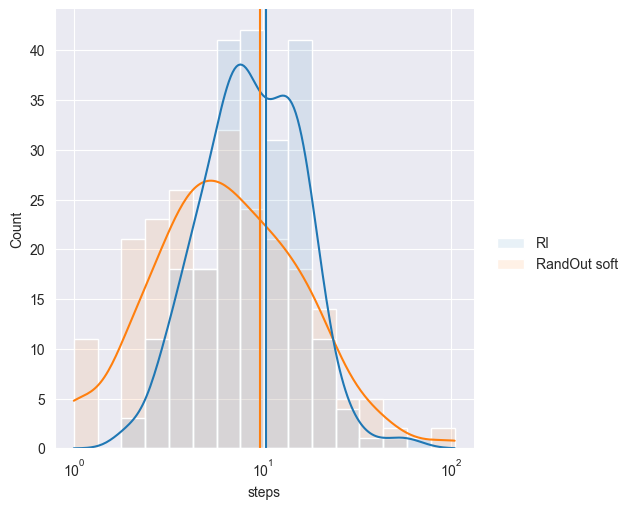

In [9]:
draw_steps_displot(data_to_draw={"RI": steps_RI,
                                 "RandOut soft": steps_RandOut_soft},
                   y_lines=(expected_values["RI"], expected_values["RandOut_soft"]),
                   multiple="layer", element="bars", alpha=0.1)

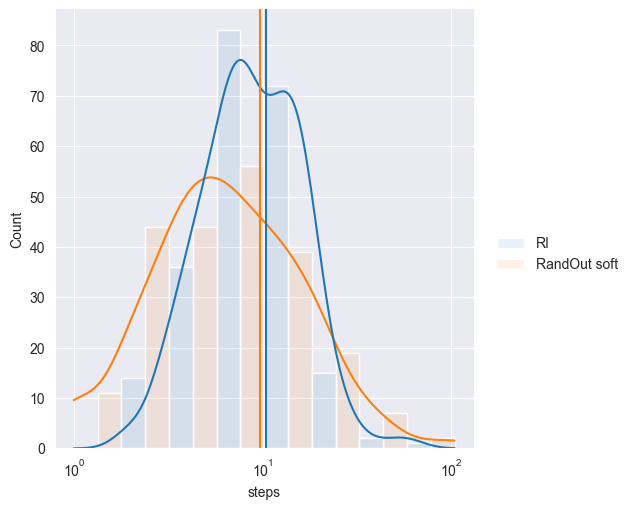

In [10]:
draw_steps_displot(data_to_draw={"RI": steps_RI,
                                 "RandOut soft": steps_RandOut_soft},
                   y_lines=(expected_values["RI"], expected_values["RandOut_soft"]),
                   multiple="dodge", element="bars", alpha=0.1, bins=8)

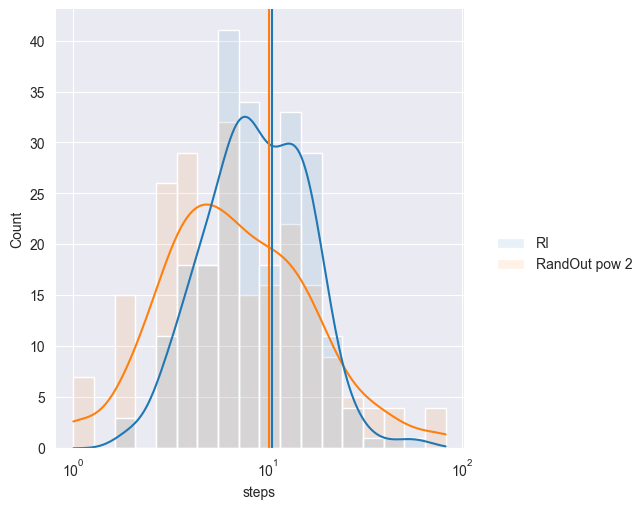

In [11]:
draw_steps_displot(data_to_draw={"RI": steps_RI,
                                 "RandOut pow 2": steps_RandOut_pow_2},
                   y_lines=(expected_values["RI"], expected_values["RandOut_pow2"]),
                   multiple="layer", element="bars", alpha=0.1)

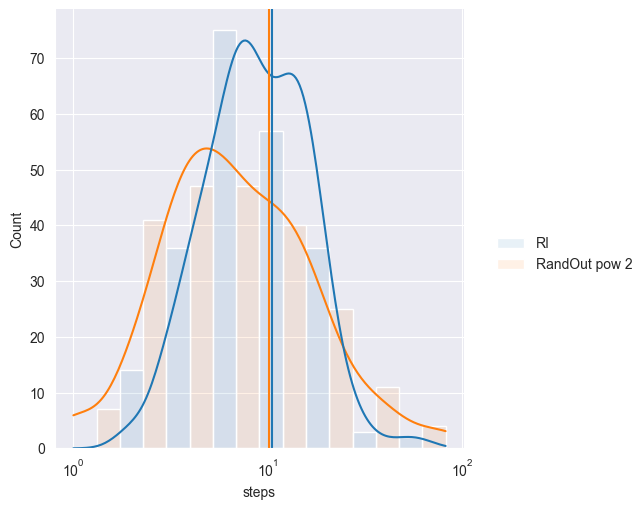

In [12]:
draw_steps_displot(data_to_draw={"RI": steps_RI,
                                 "RandOut pow 2": steps_RandOut_pow_2},
                   y_lines=(expected_values["RI"], expected_values["RandOut_pow2"]),
                   multiple="dodge", element="bars", alpha=0.1, bins=8)

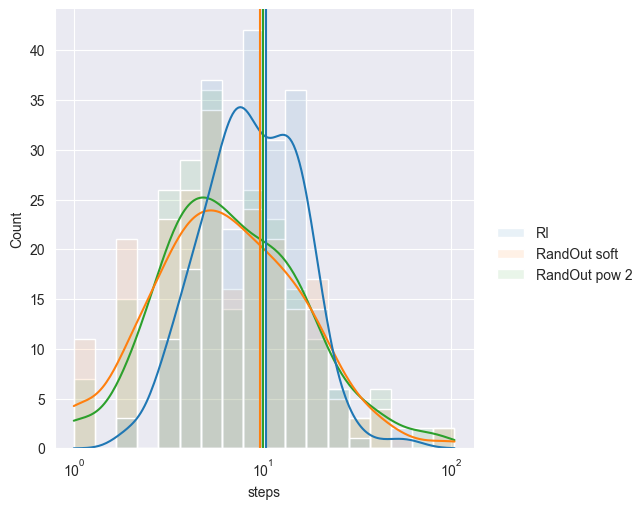

In [13]:
draw_steps_displot(data_to_draw={"RI": steps_RI,
                                 "RandOut soft": steps_RandOut_soft,
                                 "RandOut pow 2": steps_RandOut_pow_2},
                   y_lines=(expected_values["RI"], expected_values["RandOut_soft"], expected_values["RandOut_pow2"]),
                   multiple="layer", element="bars", alpha=0.1)

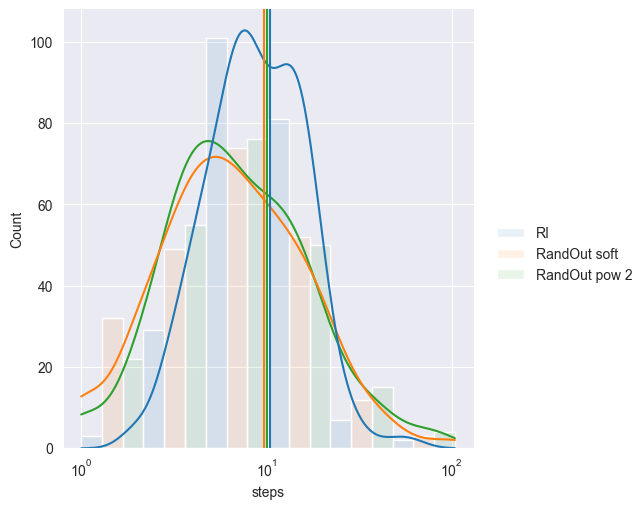

In [14]:
draw_steps_displot(data_to_draw={"RI": steps_RI,
                                 "RandOut soft": steps_RandOut_soft,
                                 "RandOut pow 2": steps_RandOut_pow_2},
                   y_lines=(expected_values["RI"], expected_values["RandOut_soft"], expected_values["RandOut_pow2"]),
                   multiple="dodge", element="bars", alpha=0.1, bins=6)

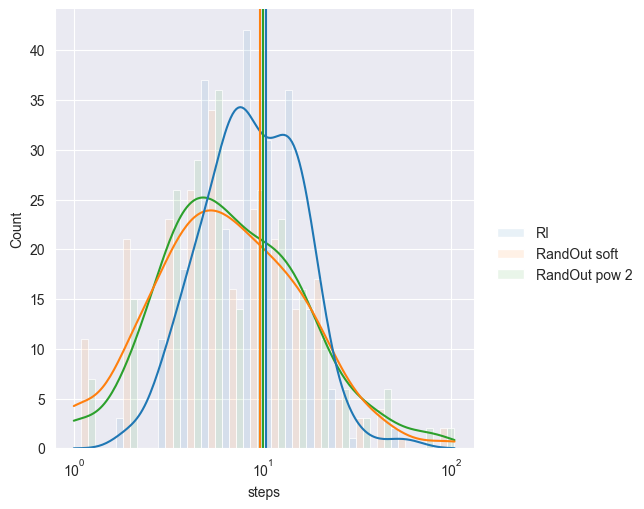

In [15]:
draw_steps_displot(data_to_draw={"RI": steps_RI,
                                 "RandOut soft": steps_RandOut_soft,
                                 "RandOut pow 2": steps_RandOut_pow_2},
                   y_lines=(expected_values["RI"], expected_values["RandOut_soft"], expected_values["RandOut_pow2"]),
                   multiple="dodge", element="bars", alpha=0.1)

## RI vs RandIn soft vs RandIn sum vs RandIn pow 2

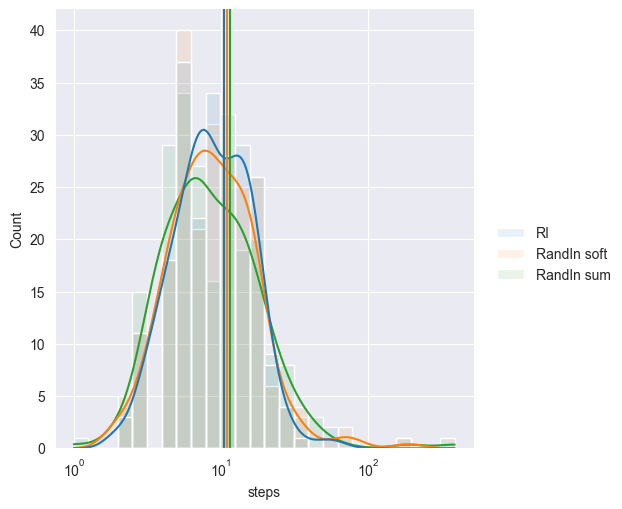

In [16]:
draw_steps_displot(data_to_draw={"RI": steps_RI,
                                 "RandIn soft": steps_RandIn_soft,
                                 "RandIn sum": steps_RandIn_sum},
                   y_lines=(expected_values["RI"], expected_values["RandIn_soft"], expected_values["RandIn_sum"]),
                   multiple="layer", element="bars", alpha=0.1)

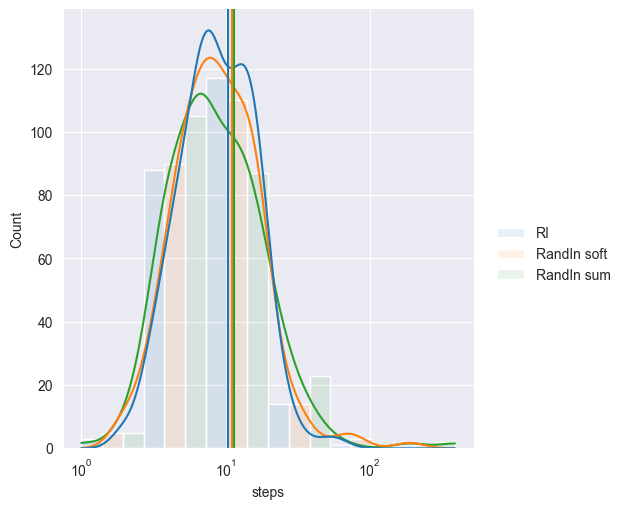

In [17]:
draw_steps_displot(data_to_draw={"RI": steps_RI,
                                 "RandIn soft": steps_RandIn_soft,
                                 "RandIn sum": steps_RandIn_sum},
                   y_lines=(expected_values["RI"], expected_values["RandIn_soft"], expected_values["RandIn_sum"]),
                   multiple="dodge", element="bars", alpha=0.1, bins=6)

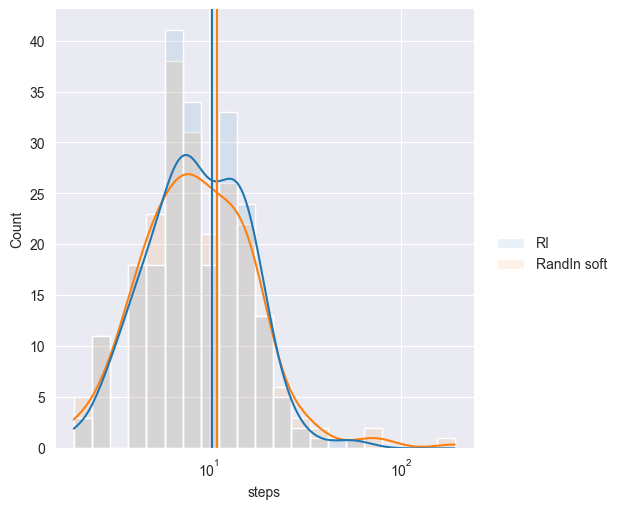

In [18]:
draw_steps_displot(data_to_draw={"RI": steps_RI,
                                 "RandIn soft": steps_RandIn_soft},
                   y_lines=(expected_values["RI"], expected_values["RandIn_soft"]),
                   multiple="layer", element="bars", alpha=0.1)

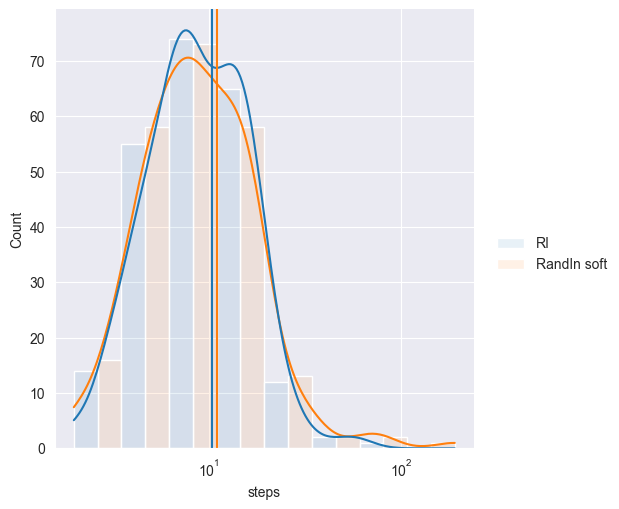

In [19]:
draw_steps_displot(data_to_draw={"RI": steps_RI,
                                 "RandIn soft": steps_RandIn_soft},
                   y_lines=(expected_values["RI"], expected_values["RandIn_soft"]),
                   multiple="dodge", element="bars", alpha=0.1, bins=8)

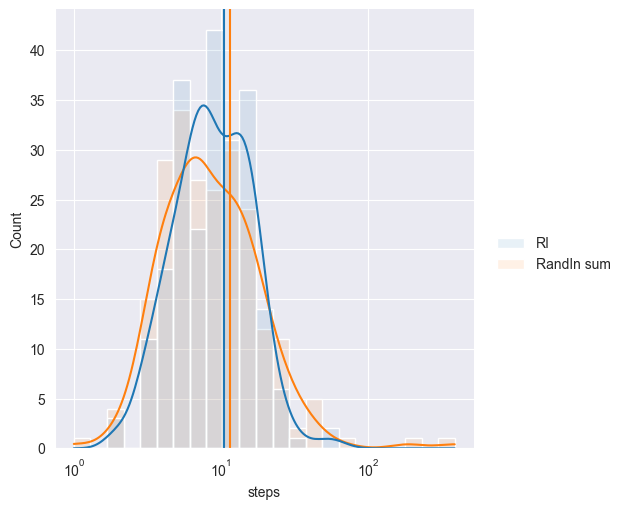

In [20]:
draw_steps_displot(data_to_draw={"RI": steps_RI,
                                 "RandIn sum": steps_RandIn_sum},
                   y_lines=(expected_values["RI"], expected_values["RandIn_sum"]),
                   multiple="layer", element="bars", alpha=0.1)

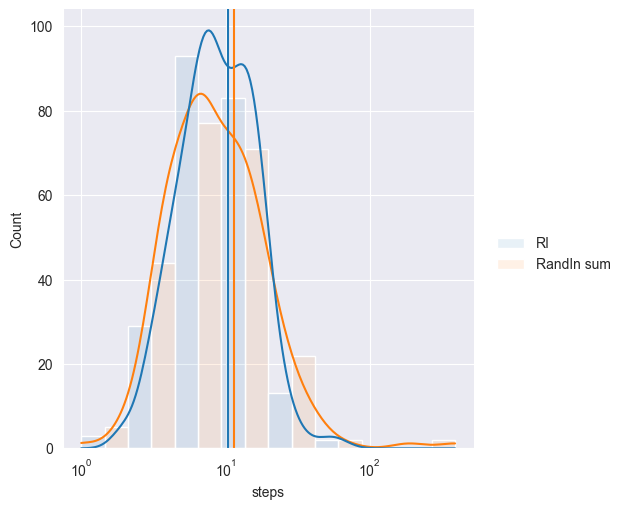

In [21]:
draw_steps_displot(data_to_draw={"RI": steps_RI,
                                 "RandIn sum": steps_RandIn_sum},
                   y_lines=(expected_values["RI"], expected_values["RandIn_sum"]),
                   multiple="dodge", element="bars", alpha=0.1, bins=8)

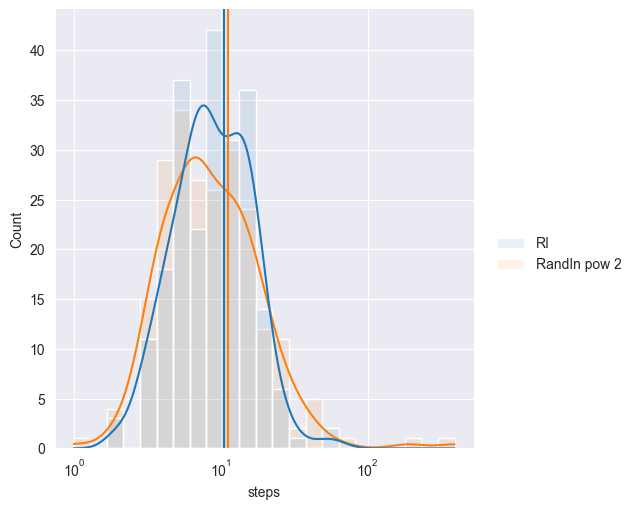

In [22]:
draw_steps_displot(data_to_draw={"RI": steps_RI,
                                 "RandIn pow 2": steps_RandIn_sum},
                   y_lines=(expected_values["RI"], expected_values["RandIn_pow2"]),
                   multiple="layer", element="bars", alpha=0.1)

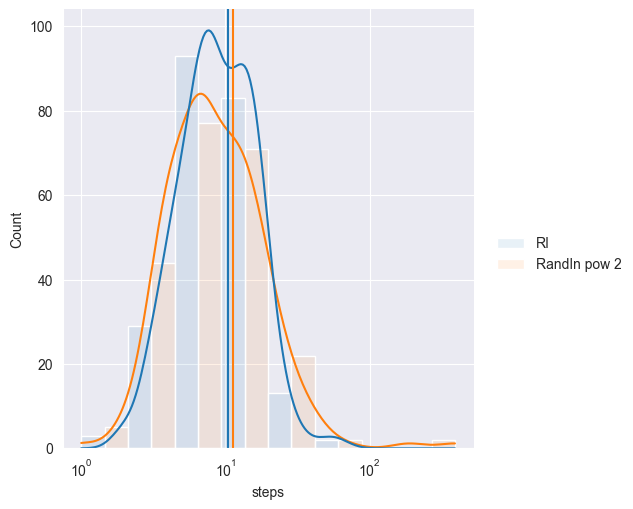

In [23]:
draw_steps_displot(data_to_draw={"RI": steps_RI,
                                 "RandIn pow 2": steps_RandIn_sum},
                   y_lines=(expected_values["RI"], expected_values["RandIn_pow2"]),
                   multiple="dodge", element="bars", alpha=0.1, bins=8)

## RandOut pow 2 vs RandIn pow 2

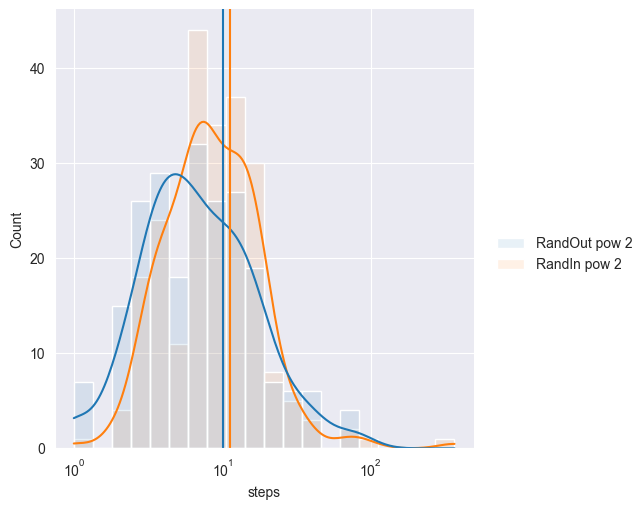

In [24]:
draw_steps_displot(data_to_draw={"RandOut pow 2": steps_RandOut_pow_2,
                                 "RandIn pow 2": steps_RandIn_pow_2},
                   y_lines=(expected_values["RandOut_pow2"], expected_values["RandIn_pow2"]),
                   multiple="layer", element="bars", alpha=0.1)

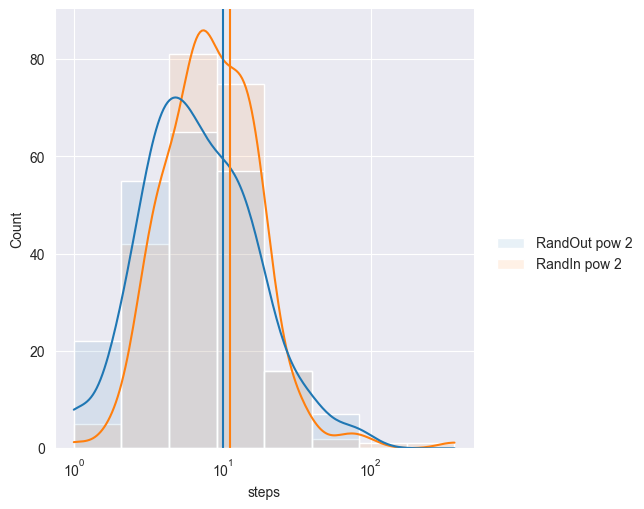

In [25]:
draw_steps_displot(data_to_draw={"RandOut pow 2": steps_RandOut_pow_2,
                                 "RandIn pow 2": steps_RandIn_pow_2},
                   y_lines=(expected_values["RandOut_pow2"], expected_values["RandIn_pow2"]),
                   multiple="layer", element="bars", alpha=0.1, bins=8)

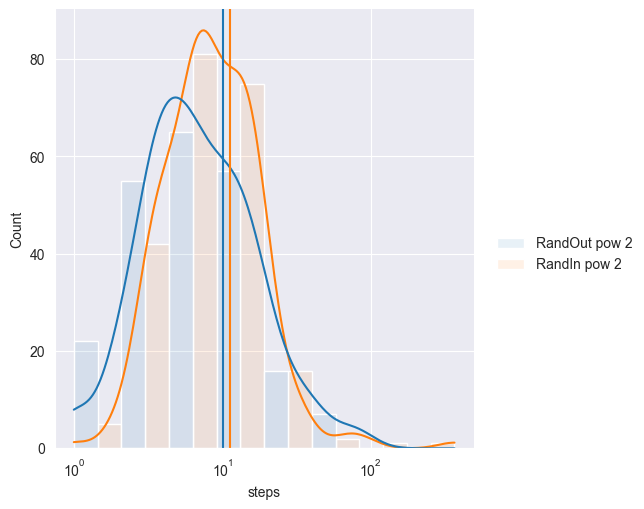

In [26]:
draw_steps_displot(data_to_draw={"RandOut pow 2": steps_RandOut_pow_2,
                                 "RandIn pow 2": steps_RandIn_pow_2},
                   y_lines=(expected_values["RandOut_pow2"], expected_values["RandIn_pow2"]),
                   multiple="dodge", element="bars", alpha=0.1, bins=8)